In [13]:
import numpy as np

# Define the XOR truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # XOR outputs

print("Inputs:\n", X)
print("Outputs:\n", y)


Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs:
 [0 1 1 0]


In [16]:

### SINGLE LAYER PERCEPTRON IMPLEMENTATION ###

class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Initialize weights (1 extra for bias)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0  # MCP Threshold function

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Weighted sum + bias
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  # Update bias

# Initialize and train Single Layer Perceptron
slp = SingleLayerPerceptron(input_size=2)
slp.train(X, y)

# Test Single Layer Perceptron performance
print("\nSingle Layer Perceptron: Actual vs Predicted Outputs")
for i in range(len(X)):
    predicted_output = slp.predict(X[i])
    print(f"Input: {X[i]} => Predicted Output: {predicted_output}, Actual Output: {y[i]}")


Single Layer Perceptron: Actual vs Predicted Outputs
Input: [0 0] => Predicted Output: 1, Actual Output: 0
Input: [0 1] => Predicted Output: 1, Actual Output: 1
Input: [1 0] => Predicted Output: 0, Actual Output: 1
Input: [1 1] => Predicted Output: 0, Actual Output: 0


After running the above code, I observed the single-layer perceptron struggles to correctly classify the XOR problem. It may correctly classify some inputs (like [0, 1] or [1, 0]), but it won't be able to handle the full XOR function because the problem is non-linearly separable.

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### MULTI-LAYER PERCEPTRON IMPLEMENTATION ###

# Define the Multi-Layer Perceptron model
mlp_model = Sequential()
mlp_model.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons and ReLU activation
mlp_model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
mlp_model.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
_, accuracy = mlp_model.evaluate(X, y)
print(f"\nMLP Accuracy: {accuracy * 100:.2f}%")

# Get predictions from MLP model
mlp_predictions = mlp_model.predict(X)

# Display actual vs predicted outputs for MLP
print("\nMulti-Layer Perceptron: Actual vs Predicted Outputs")
for i in range(len(X)):
    predicted_output = np.round(mlp_predictions[i][0])  # Rounding sigmoid output to 0 or 1
    print(f"Input: {X[i]} => Predicted Output: {predicted_output}, Actual Output: {y[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7500 - loss: 0.6350

MLP Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Multi-Layer Perceptron: Actual vs Predicted Outputs
Input: [0 0] => Predicted Output: 0.0, Actual Output: 0
Input: [0 1] => Predicted Output: 1.0, Actual Output: 1
Input: [1 0] => Predicted Output: 1.0, Actual Output: 1
Input: [1 1] => Predicted Output: 1.0, Actual Output: 0


# B. Sentiment Analysis Using ANN on IMDb Movie Reviews

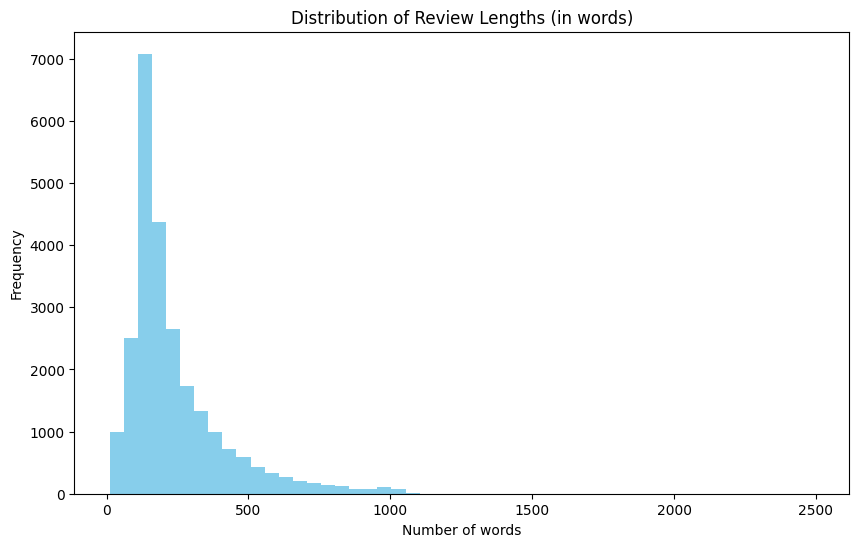

In [21]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset again
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# 1. Distribution of review lengths
review_lengths = [len(review) for review in X_train]

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

<ipython-input-26-7d9c7198ad6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=review_lengths, palette="Set3")


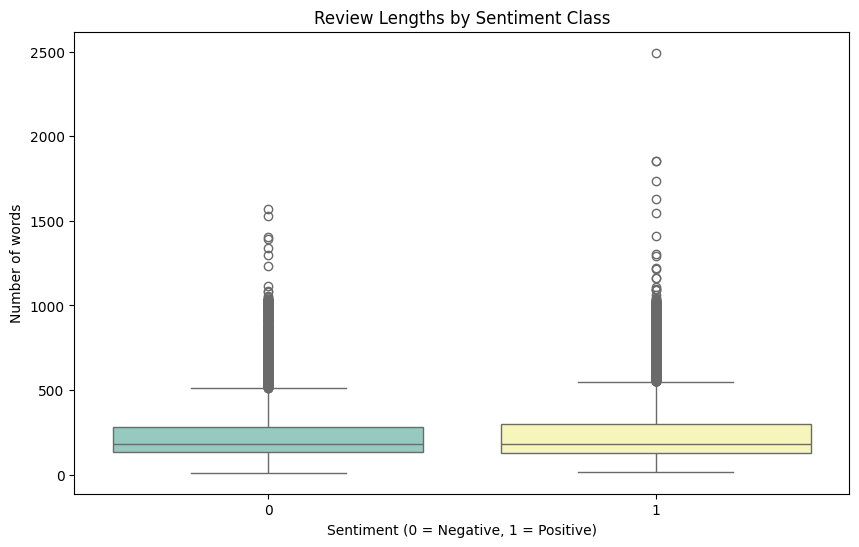

In [26]:
# Boxplot of review lengths by class
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=review_lengths, palette="Set3")
plt.title('Review Lengths by Sentiment Class')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Number of words')
plt.show()

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6789 - loss: 0.5501

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.6796 - loss: 0.5494 - val_accuracy: 0.8592 - val_loss: 0.3395
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9688 - loss: 0.0975 - val_accuracy: 0.8388 - val_loss: 0.4261
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9982 - loss: 0.0100 - val_accuracy: 0.8380 - val_loss: 0.5346
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.8424 - val_loss: 0.5493
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 1.0000 - loss: 4.8759e-04 - val_accuracy: 0.8438 - val_loss: 0.5675
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8426 - loss: 0.5677
Test Accuracy: 0.8444399833679199
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


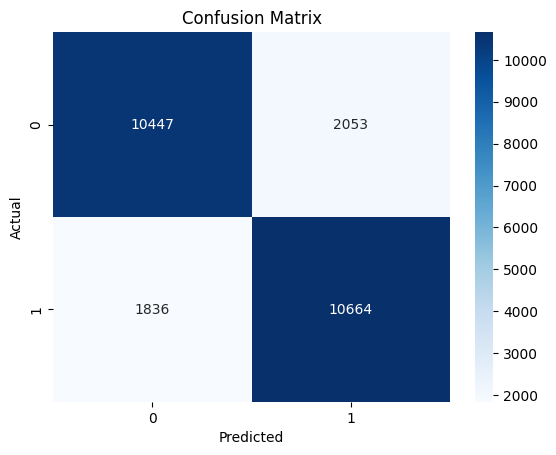

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     12500
           1       0.84      0.85      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



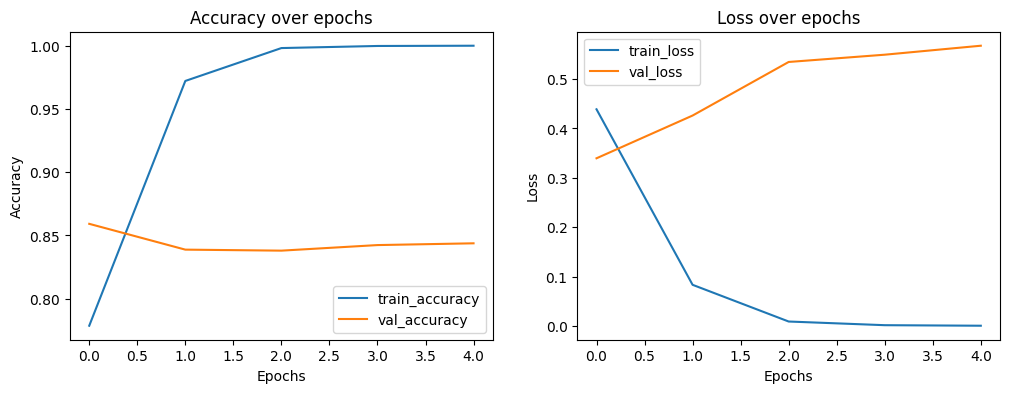

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import ReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Load IMDb dataset (using TensorFlow's built-in dataset)
from tensorflow.keras.datasets import imdb

# Load the dataset, keeping the top 10,000 words
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Preprocessing
# Pad sequences to ensure uniform input size
max_len = 200  # Maximum length of a review
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)

# Model Architecture
model = Sequential()

# Embedding Layer for word vectors
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Add a hidden layer with ReLU activation
model.add(Flatten())
model.add(Dense(64))
model.add(ReLU())  # ReLU activation for hidden layer

# Output layer with sigmoid activation for binary classification
model.add(Dense(1))
model.add(Activation('sigmoid'))  # Sigmoid activation for output layer

# Compile the model
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predictions and Performance Evaluation
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Visualize training history (loss and accuracy)
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


# 1. Preprocessing Steps:
Padding: We pad the sequences to ensure they are of the same length (max_len=200) for input to the ANN.
# 2. Model Architecture:
* Embedding Layer: Used to convert word indexes into dense vectors of fixed size (128). It maps each word to a high-dimensional vector that captures its meaning.
* Dense Layers & ReLU Activation: A dense layer with 64 units and ReLU activation is added for hidden representation. ReLU is chosen because it helps in avoiding vanishing gradients and improves training speed.
* Output Layer with Sigmoid Activation: Since this is a binary classification task (positive/negative), a single output node with sigmoid activation is used to output probabilities. If the output is greater than 0.5, it is classified as positive, else negative.
# 3. Activation Functions:
* ReLU (Rectified Linear Unit) is used in the hidden layer because it allows the model to learn faster and handles non-linearities well, especially for deeper networks.
* Sigmoid activation in the output layer maps the output to a probability between 0 and 1, which is useful for binary classification.
# 4. Loss Function:
Binary Cross-Entropy is suitable for this binary classification task because it measures the difference between the actual and predicted probability distributions, making it ideal for this problem.
# 5. Evaluation:
* Accuracy: Accuracy on the test set is printed after evaluation.
* Confusion Matrix: Visualizes the model's prediction performance, showing how well the model predicts positive and negative reviews.
* Classification Report: Provides precision, recall, and F1-score for each class.
* Training History Visualization: Plots accuracy and loss during training to observe overfitting or underfitting.